In [81]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix


In [82]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [83]:
df.head

<bound method NDFrame.head of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.

In [84]:
df.tail

<bound method NDFrame.tail of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.

In [85]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [86]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [88]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print(df)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

In [89]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<Axes: >

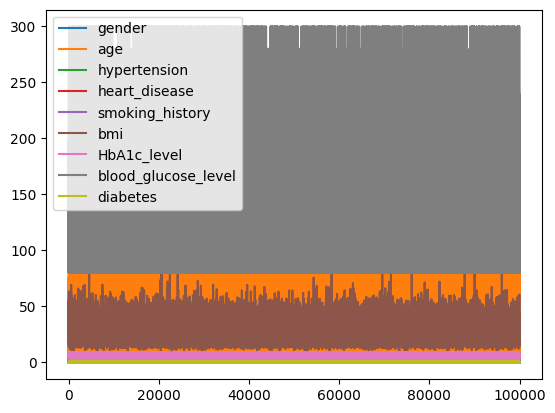

In [90]:
df.plot()

In [91]:
x=df.drop('diabetes',axis=1)
y=df['diabetes']

In [92]:
model= DecisionTreeClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.2 , random_state=123)


In [93]:
model.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [94]:
y_pred=model.predict(xtest)
print(y_pred)

[0 0 0 ... 0 1 0]


In [95]:
acc=accuracy_score(ytest,y_pred)
print (acc)

0.94875


In [96]:
print(confusion_matrix(ytest,y_pred))

[[17702   549]
 [  476  1273]]


In [97]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18251
           1       0.70      0.73      0.71      1749

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



Confusion Matrix:
 [[17702   549]
 [  476  1273]]


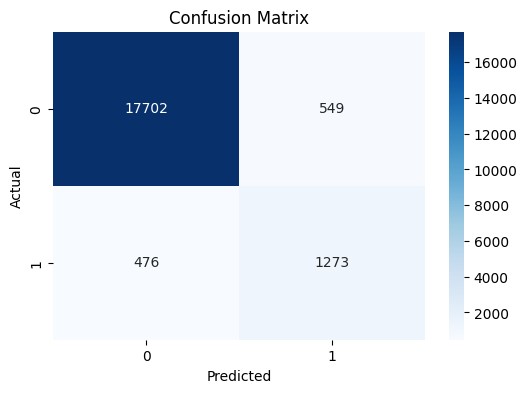

In [98]:

# ------------------------------------------
# Confusion Matrix
# ------------------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() 

In [99]:
from sklearn.metrics import  roc_auc_score, roc_curve,confusion_matrix,ConfusionMatrixDisplay

y_prob = model.predict_proba(xtest)[:, 1]
auc_score = roc_auc_score(ytest, y_prob)
print("AUC Score:", auc_score)

AUC Score: 0.8487751589478764


In [100]:
# ------------------------------------------
# ROC Curve & AUC
# ------------------------------------------
fpr, tpr, thresholds = roc_curve(ytest, y_prob)

print("False Positive Rate (FPR):", fpr[:5])
print("True Positive Rate (TPR):", tpr[:5])
print("Thresholds:", thresholds[:5])



False Positive Rate (FPR): [0.         0.03002575 0.03008054 0.03090242 0.031012  ]
True Positive Rate (TPR): [0.         0.72784448 0.72784448 0.72784448 0.72784448]
Thresholds: [       inf 1.         0.66666667 0.5        0.33333333]


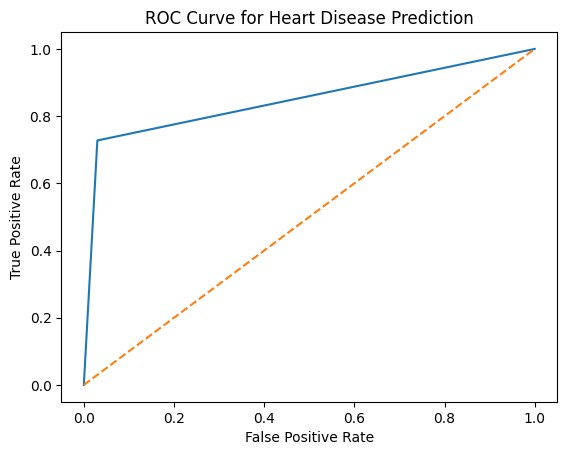

In [101]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Heart Disease Prediction")
plt.show()

In [102]:
#### XGBoost Algorithm

model=XGBClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.2 , random_state=123)






In [103]:
model.fit(xtrain, ytrain)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [104]:
y_pred=model.predict(xtest)
print(y_pred)

[0 0 0 ... 0 0 0]


In [105]:
acc=accuracy_score(ytest,y_pred)
print (acc)

0.96935


In [106]:
model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.2 , random_state=123)

In [107]:
model.fit(xtrain, ytrain)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [108]:
y_pred=model.predict(xtest)

In [109]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [110]:
acc=accuracy_score(ytest,y_pred)
print (acc)

0.95565
